# CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
from sklearn.datasets import load_sample_image
# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255
images = np.array([china, flower])
batch_size, height, width, channels = images.shape

In [3]:
images.shape # batch, width, height, channels

(2, 427, 640, 3)

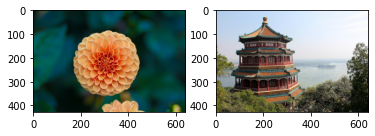

In [4]:
plt.subplot(1,2,1)
plt.imshow(flower)
plt.subplot(1,2,2)
plt.imshow(china)

In [5]:
# Create 2 filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:, 3, :, 0] = 1 # vertical line
filters[3, :, :, 1] = 1 # horizontal line

In [6]:
filters.shape # width, height, channels, how many feature maps (filters)

(7, 7, 3, 2)

In [7]:
filters[:,:,1,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
filters[:,:,2,1]

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
outputs = tf.nn.conv2d(images, filters, strides=1, padding="SAME")

In [10]:
outputs.shape # 2 images in batch each has width, height and feature maps: 2, 

TensorShape([2, 427, 640, 2])

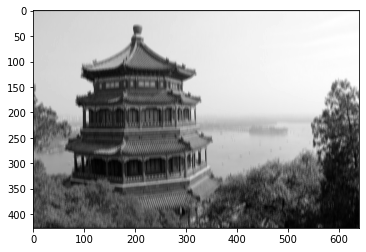

In [11]:
plt.imshow(outputs[0, :, :, 0], cmap="gray") # plot 1st image's 1st feature map
map
plt.show()

* Explanation
    - The pixel intensity for each color channel is represented as a byte from 0 to 255, so we scale these features simply by dividing by 255, to get floats ranging from 0 to 1.
    - Then we create two 7 × 7 filters (one with a vertical white line in the middle, and the other with a horizontal white line in the middle).
    - We apply them to both images using the tf.nn.conv2d() function. In this example, we use zero padding (padding="same") and a stride of 2.
    - Finally, we plot one of the resulting feature maps

In tensorflow:
``` python
conv = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1,
padding="same", activation="relu")
```
This code creates a Conv2D layer with 32 filters, each 3 × 3, using a stride
of 1 (both horizontally and vertically) and "same" padding, and applying
the ReLU activation function to its outputs.

In tensorflow, maxpool:
``` python
max_pool = keras.layers.MaxPool2D(pool_size=2)
```
Creates a max pooling layer using a 2 × 2 kernel. The strides default to the kernel size, so this layer will use a stride of 2

In [11]:
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [13]:
train_images.shape

(60000, 28, 28)

In [14]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

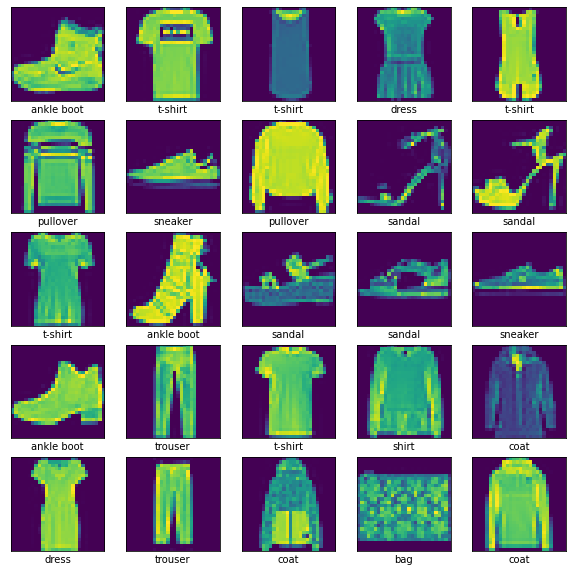

In [15]:
class_names = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(64, (7,7), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3),padding="same", activation='relu'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 256)         295168    
                                                                 
Total params: 372,224
Trainable params: 372,224
Non-trai

Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64).

- The first layer uses 64 fairly large filters (7 × 7) but no stride
because the input images are not very large. It also sets
input_shape=[28, 28, 1], because the images are 28 × 28
pixels, with a single color channel (i.e., grayscale).
- Next we have a max pooling layer which uses a pool size of 2, so it
divides each spatial dimension by a factor of 2.
- Then we repeat the same structure twice: one convolutional layer
followed by a max pooling layer. For larger images, we could
repeat this structure several more times (the number of repetitions
is a hyperparameter you can tune).
- Note that the number of filters grows as we climb up the CNN
toward the output layer (it is initially 64, then 128, then 256): it
makes sense for it to grow, since the number of low-level features
is often fairly low (e.g., small circles, horizontal lines), but there
are many different ways to combine them into higher-level
features. 
- It is a common practice to double the number of filters
after each pooling layer: since a pooling layer divides each spatial
dimension by a factor of 2, we can afford to double the number of
feature maps in the next layer without fear of exploding the
number of parameters, memory usage, or computational load.

To complete the model, you will feed the last output tensor from the convolutional base (of shape (7, 7, 256)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. 

In [18]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

Next is the fully connected network, composed of two hidden
dense layers and a dense output layer. Note that we must flatten its
inputs, since a dense network expects a 1D array of features for
each instance. We also add two dropout layers, with a dropout rate
of 50% each, to reduce overfitting.

In [19]:
batch_size = 256
train_iter = tf.data.Dataset.from_tensor_slices(
    (train_images, train_labels)).batch(batch_size).shuffle(len(train_images[0]))

In [20]:
#add a batch dimension at the last. And cast label to int32
process = lambda X, y: (tf.expand_dims(X, axis=3),
                            tf.cast(y, dtype='int32'))

In [21]:
f = tf.expand_dims(train_images, axis=3)
print(f.shape, train_images.shape)

(60000, 28, 28, 1) (60000, 28, 28)


In [22]:
train_iter = train_iter.map(process)

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 371s 197ms/step - loss: 0.9221 - accuracy: 0.6561 - val_loss: 0.4543 - val_accuracy: 0.8398
Epoch 2/10
1875/1875 [==============================] - 281s 150ms/step - loss: 0.5990 - accuracy: 0.7883 - val_loss: 0.3472 - val_accuracy: 0.8849
Epoch 3/10
1875/1875 [==============================] - 366s 195ms/step - loss: 0.5150 - accuracy: 0.8235 - val_loss: 0.3397 - val_accuracy: 0.8906
Epoch 4/10
1875/1875 [==============================] - 367s 196ms/step - loss: 0.4675 - accuracy: 0.8403 - val_loss: 0.3210 - val_accuracy: 0.8914
Epoch 5/10
1875/1875 [==============================] - 380s 203ms/step - loss: 0.4306 - accuracy: 0.8546 - val_loss: 0.3119 - val_accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 381s 203ms/step - loss: 0.3978 - accuracy: 0.8678 - val_loss: 0.3238 - val_accuracy: 0.8964
Epoch 7/10
1875/1875 [==============================] - 430s 229ms/step - loss: 0.3702 - accuracy: 0.8740 - val_

313/313 - 9s - loss: 0.3066 - accuracy: 0.9102 - 9s/epoch - 28ms/step


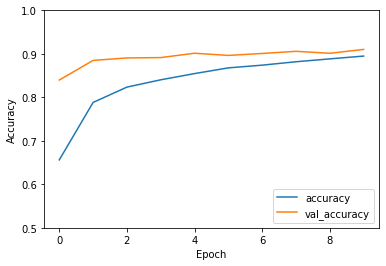

In [24]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [25]:
print(test_acc)

0.9101999998092651
